In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np
import nltk

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

import matplotlib.pyplot as plt

nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0819 20:09:57.140015 140455451195264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 20:09:57.153688 140455451195264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 20:09:57.155914 140455451195264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 20:09:57.267820 140455451195264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 20:09:57.290756 140455451195264 deprecation_wrappe

x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               22912     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,023,041
Trainable params: 1,023,041
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0819 20:09:57.579004 140455451195264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6472 - acc: 0.5981 - val_loss: 0.6133 - val_acc: 0.6517
Epoch 2/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4686 - acc: 0.7801 - val_loss: 0.4376 - val_acc: 0.8038
Epoch 3/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.3603 - acc: 0.8506 - val_loss: 0.4548 - val_acc: 0.8004
Epoch 4/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.3293 - acc: 0.8683 - val_loss: 0.4913 - val_acc: 0.7954
Epoch 5/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.3777 - acc: 0.8347 - val_loss: 0.6284 - val_acc: 0.7800
Epoch 6/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.3563 - acc: 0.8478 - val_loss: 0.5788 - val_acc: 0.7047
Epoch 7/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2834 - acc: 0.8895 - val_loss: 0.5447 - val_acc

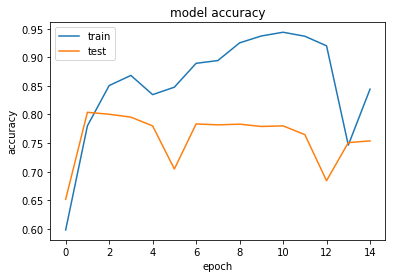

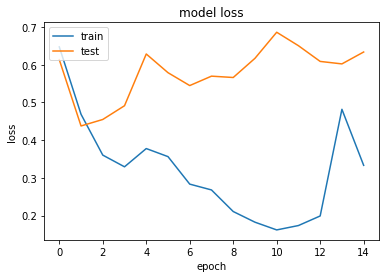

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 50))
model.add(SimpleRNN(128, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "good movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

array([[0.05273286]], dtype=float32)